In [196]:
## Build Xrefs
import networkx as nx
import matplotlib.pyplot as plt
from pymongo import MongoClient
from collections import Counter
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [197]:
g = nx.Graph()
client = MongoClient()

- **CTDBase**: Disease -> GO, pathways, chemicals, genes (not done)
 - IDs: MESH or OMIM
 - xref: None
- **Disease ontology**: Disease -> Disease
 - IDs: DOID
 - xref: (many. most common in order:) SNOMEDCT_US_2016_03_01, UMLS_CUI, NCI, OMIM, ICD10CM, MESH, ICD9CM, ORDO, EFO, CSP, KEGG
- **DisGeNet**: Disease -> genes
 - IDs: umls
 - xref: None
- **HPO** (human phenotype ontology): Phenotypes/symptoms
 - IDs: HP
 - xref: UMLS, MESH, SNOMEDCT, MEDDRA, ICD-10
- **HPO** (clinical annotations): Disease -> phenotypes
 - IDs: OMIM, ORPHANET, DECIPHER
 - xref: None
- **MESH**: Disease -> Disease
 - IDs: MESH
 - xref: None
- **OMIM**: Not sure if license allows use
 - IDs: OMIM
 - xref: None
- **Orphanet** (ORDO): Disease -> Disease
 - IDs: Orphanet
 - xref: OMIM, ICD-10, UMLS, MESH, MedDRA


## to do

- Mondo:  https://raw.githubusercontent.com/DiseaseOntology/HumanDiseaseOntology/master/src/experimental/mondo.obo
- UMLS
- uniprot diseases (disease -> protein)
- medgen?
- GTR? ftp://ftp.ncbi.nlm.nih.gov/pub/GTR/_README.html (genetic tests)
- clinvar (variants associated with disease)
- kegg
- wormbase & mouse genome informatics (model systems)


http://www.ebi.ac.uk/gene2phenotype/downloads/DDG2P.csv.gz
Development Disorder Genotype – Phenotype Database (DDG2P)  – a curated list of genes reported to be associated with developmental disorders, compiled by clinicians as part of the DDD study to facilitate clinical feedback of likely causal variants. Please note: This file is maintained by the European Bioinformatics Institute. Its contents may differ from DECIPHER due to different update cycles. 

In [198]:
## Ordo / orphanet
db = client.mydisease.orphanet
for doc in db.find({'xref':{'$exists': True}},{'xref':1}):
    for xref in doc['xref']:
        g.add_edge(doc['_id'],xref)

In [199]:
## disease ontology
db = client.mydisease.DO
for doc in db.find({'xref':{'$exists': True}},{'xref':1}):
    for xref in doc['xref']:
        g.add_edge(doc['_id'],xref)

In [200]:
## human phenotype ontology
db = client.mydisease.HPO
for doc in db.find({'xref':{'$exists': True}},{'xref':1}):
    for xref in doc['xref']:
        g.add_edge(doc['_id'],xref)

In [201]:
## check if my IDs are consistent

In [202]:
sorted(sorted(Counter([x.split(":")[0] for x in g.nodes()]).items(),key=lambda x:x[1], reverse=True)[:20], key=lambda x:x[0])

[('CSP', 38),
 ('DOID', 6359),
 ('EFO', 131),
 ('EPCC', 13),
 ('HP', 4078),
 ('ICD10CM', 3535),
 ('ICD9CM', 2589),
 ('KEGG', 37),
 ('MEDDRA', 104),
 ('MESH', 4238),
 ('MedDRA', 1212),
 ('NCI', 4530),
 ('NCI2009_04D', 30),
 ('OMIM', 6403),
 ('Orphanet', 5557),
 ('SNOMEDCT', 289),
 ('SNOMEDCT_US_2016_03_01', 11476),
 ('UMLS_CUI', 11778),
 ('pmid', 20),
 ('url', 36)]

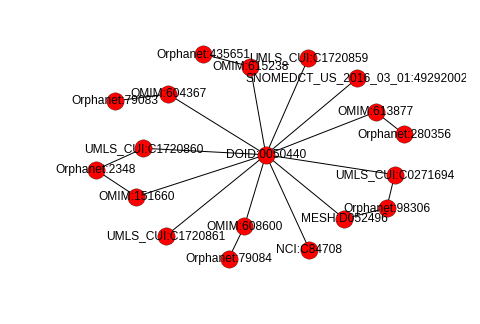

In [204]:
gg = nx.ego_graph(g, 'DOID:0050440', radius=3, center=True, undirected=True)
nx.draw_spring(gg, with_labels=True)

{'DOID:0050440': <matplotlib.text.Text at 0x7f010b388fd0>,
 'MESH:D052496': <matplotlib.text.Text at 0x7f010b39b048>,
 'OMIM:151660': <matplotlib.text.Text at 0x7f010ba8cf98>,
 'OMIM:604367': <matplotlib.text.Text at 0x7f010b388518>,
 'OMIM:608600': <matplotlib.text.Text at 0x7f010b3b9ac8>,
 'OMIM:613877': <matplotlib.text.Text at 0x7f010b388a90>,
 'OMIM:615238': <matplotlib.text.Text at 0x7f010b3b9588>,
 'Orphanet:98306': <matplotlib.text.Text at 0x7f010b39b5c0>,
 'UMLS_CUI:C0271694': <matplotlib.text.Text at 0x7f010b39bb00>,
 'UMLS_CUI:C1720859': <matplotlib.text.Text at 0x7f0128a7e630>,
 'UMLS_CUI:C1720861': <matplotlib.text.Text at 0x7f010ba8ca20>}

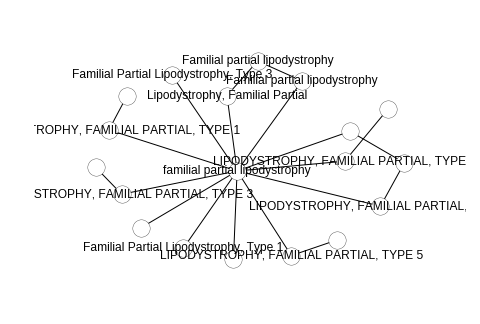

In [205]:
# https://monarchinitiative.org/disease/DOID:0050440
labels = {'MESH:D052496': 'Lipodystrophy, Familial Partial',
         'Orphanet:98306': 'Familial partial lipodystrophy',
         'UMLS_CUI:C0271694': 'Lipodystrophy, Familial Partial',
         'DOID:0050440': 'familial partial lipodystrophy',
         'OMIM:151660': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 2',
         'OMIM:604367': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 3',
         'OMIM:615238': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 5',
         'OMIM:613877': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 4',
         'OMIM:608600': 'LIPODYSTROPHY, FAMILIAL PARTIAL, TYPE 1',
         'UMLS_CUI:C1720859': 'Familial Partial Lipodystrophy, Type 1',
         'UMLS_CUI:C0271694': 'Familial partial lipodystrophy',
         'UMLS_CUI:C1720861': 'Familial Partial Lipodystrophy, Type 3'}
pos = nx.spring_layout(gg)
nx.draw(gg,pos,node_color='w')
nx.draw_networkx_labels(gg, pos, labels=labels)

In [209]:
db = client.mydisease.orphanet
print([x['preferred_label'] for x in db.find({'_id':{'$in': gg.nodes()}},{'name':1,'preferred_label':1})])

['Familial partial lipodystrophy, Dunnigan type', 'PLIN1-related familial partial lipodystrophy', 'CIDEC-related familial partial lipodystrophy', 'PPARG-related familial partial lipodystrophy', 'Familial partial lipodystrophy, Köbberling type', 'Familial partial lipodystrophy']


### Look at all connected component subgraphs

In [138]:
ccs = nx.connected_component_subgraphs(g)
print("number of cc subgraphs: ")
print(len(list(ccs)))

number of cc subgraphs: 
8241


In [139]:
ccs = list(nx.connected_component_subgraphs(g))
print("Count of number of DO IDs in each ccs")
print(Counter([len([x for x in subgraph.nodes() if x.startswith("DOID:")]) for subgraph in ccs]))

Count of number of DO IDs in each ccs
Counter({0: 3896, 1: 3893, 2: 232, 3: 93, 4: 44, 5: 22, 6: 16, 8: 7, 7: 6, 11: 6, 9: 4, 10: 3, 12: 3, 13: 3, 17: 3, 14: 2, 15: 2, 22: 2, 208: 1, 21: 1, 24: 1, 630: 1})


### Of CCS with 0 DO IDs, how large are the subgraphs?

In [140]:
print(Counter([len(subgraph) for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==0]))

Counter({2: 2799, 3: 606, 4: 241, 5: 107, 6: 45, 7: 20, 10: 19, 8: 13, 9: 7, 11: 7, 12: 6, 13: 6, 15: 4, 17: 4, 14: 2, 16: 2, 27: 2, 18: 1, 21: 1, 22: 1, 23: 1, 26: 1, 31: 1})


In [144]:
# look at the largest one?
sg = [subgraph for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==0 and len(subgraph)==31][0]
db = client.mydisease.orphanet
print("orphanet names")
print([x['preferred_label'] for x in db.find({'_id':{'$in': sg.nodes()}},{'name':1,'preferred_label':1})])
print(sg.nodes())

orphanet names
['Mosaic trisomy 3', 'Mosaic trisomy 1', 'Mosaic trisomy 12', 'Mosaic trisomy 14', 'Mosaic trisomy 15', 'Mosaic trisomy 16', 'Mosaic trisomy 17', 'Mosaic trisomy 2', 'Mosaic trisomy 20', 'Mosaic trisomy 7', 'Mosaic trisomy 4', 'Mosaic trisomy 5', 'Mosaic trisomy 8', 'Mosaic trisomy 10', 'Mosaic trisomy 22', 'Mosaic trisomy 9']
['MedDRA:10053916', 'UMLS_CUI:C2931631', 'MESH:C535489', 'Orphanet:99776', 'Orphanet:100071', 'Orphanet:1723', 'MESH:C537940', 'UMLS_CUI:C2931326', 'MESH:C537822', 'ICD10CM:Q92.1', 'UMLS_CUI:C2931327', 'Orphanet:96061', 'UMLS_CUI:C2931707', 'Orphanet:1698', 'Orphanet:1711', 'Orphanet:96063', 'Orphanet:96068', 'MESH:C536796', 'Orphanet:1706', 'UMLS_CUI:C2930917', 'Orphanet:1747', 'Orphanet:1708', 'MESH:C535454', 'Orphanet:1692', 'MESH:C538037', 'Orphanet:96059', 'UMLS_CUI:C2930908', 'Orphanet:1724', 'Orphanet:1703', 'UMLS_CUI:C1096527', 'Orphanet:96060']


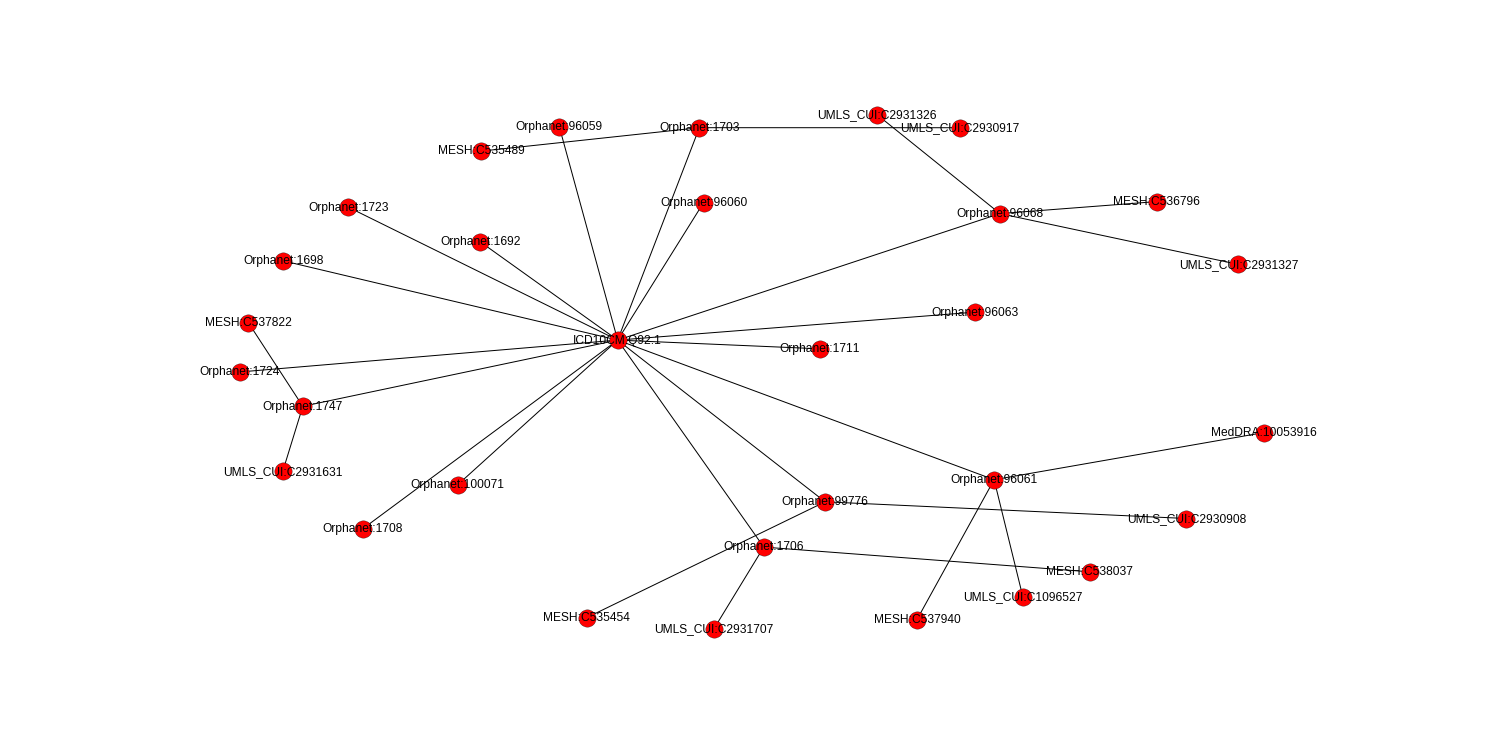

In [145]:
plt.figure(figsize=(20,10))
pos = nx.spring_layout(sg)
nx.draw(sg, pos, with_labels=True)

### CC with 4 DO IDs

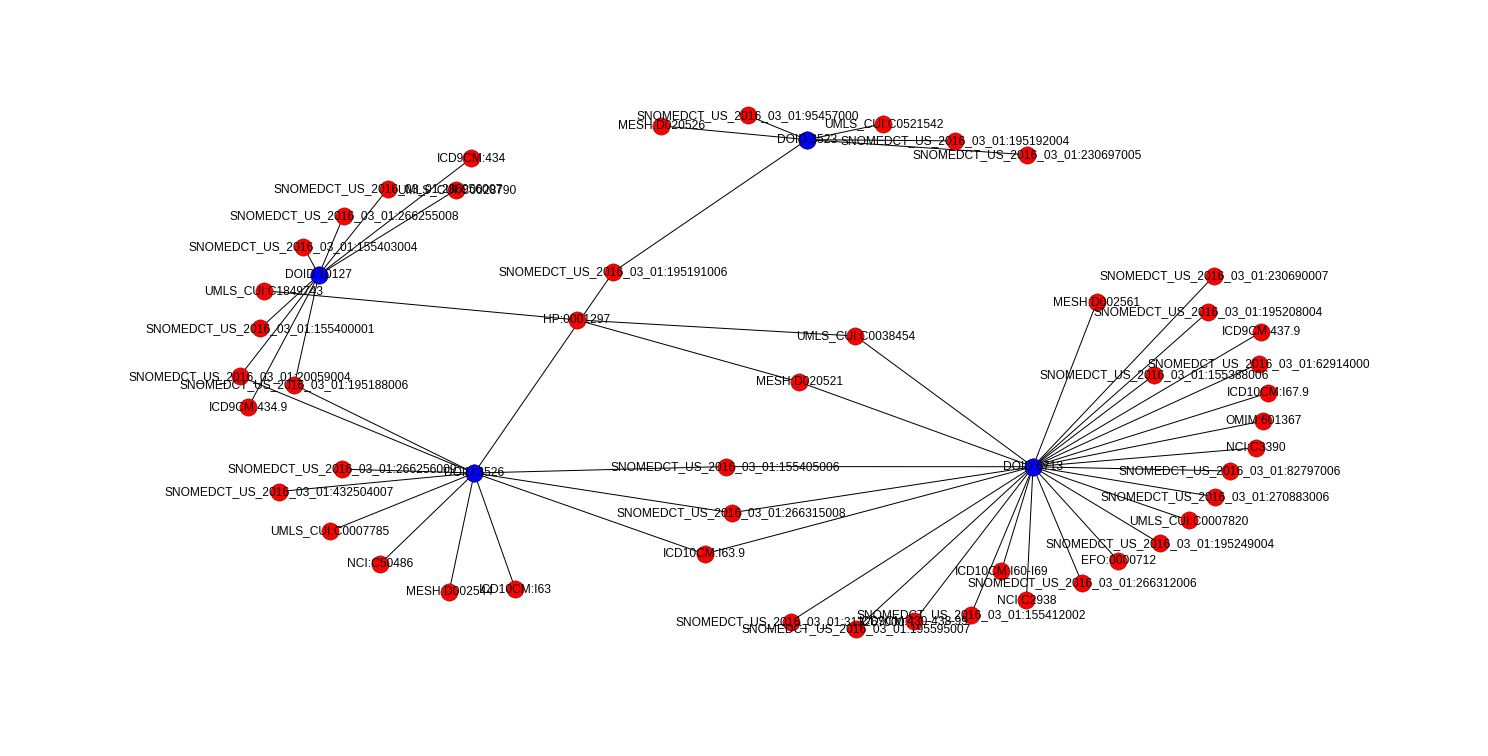

In [146]:
sg = [subgraph for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==4 and len(subgraph)>20][0]
plt.figure(figsize=(20,10))
pos = nx.layout.fruchterman_reingold_layout(sg)
nx.draw(sg, pos, with_labels=True)
do_ids = [x for x in sg.nodes() if x.startswith("DOID:")]
nx.draw_networkx_nodes(sg,pos,nodelist=do_ids,node_color='b')

### CC with 5 DO IDs

In [159]:
Counter([len(subgraph) for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==1])

Counter({2: 63,
         3: 1386,
         4: 573,
         5: 438,
         6: 297,
         7: 247,
         8: 158,
         9: 148,
         10: 112,
         11: 83,
         12: 75,
         13: 63,
         14: 43,
         15: 41,
         16: 26,
         17: 20,
         18: 18,
         19: 16,
         20: 6,
         21: 12,
         22: 5,
         23: 12,
         24: 8,
         25: 2,
         26: 3,
         27: 3,
         28: 3,
         29: 6,
         30: 3,
         31: 1,
         32: 2,
         33: 3,
         35: 4,
         36: 2,
         37: 1,
         40: 1,
         41: 1,
         42: 1,
         43: 1,
         44: 3,
         46: 1,
         49: 2})

['DOID:9574']


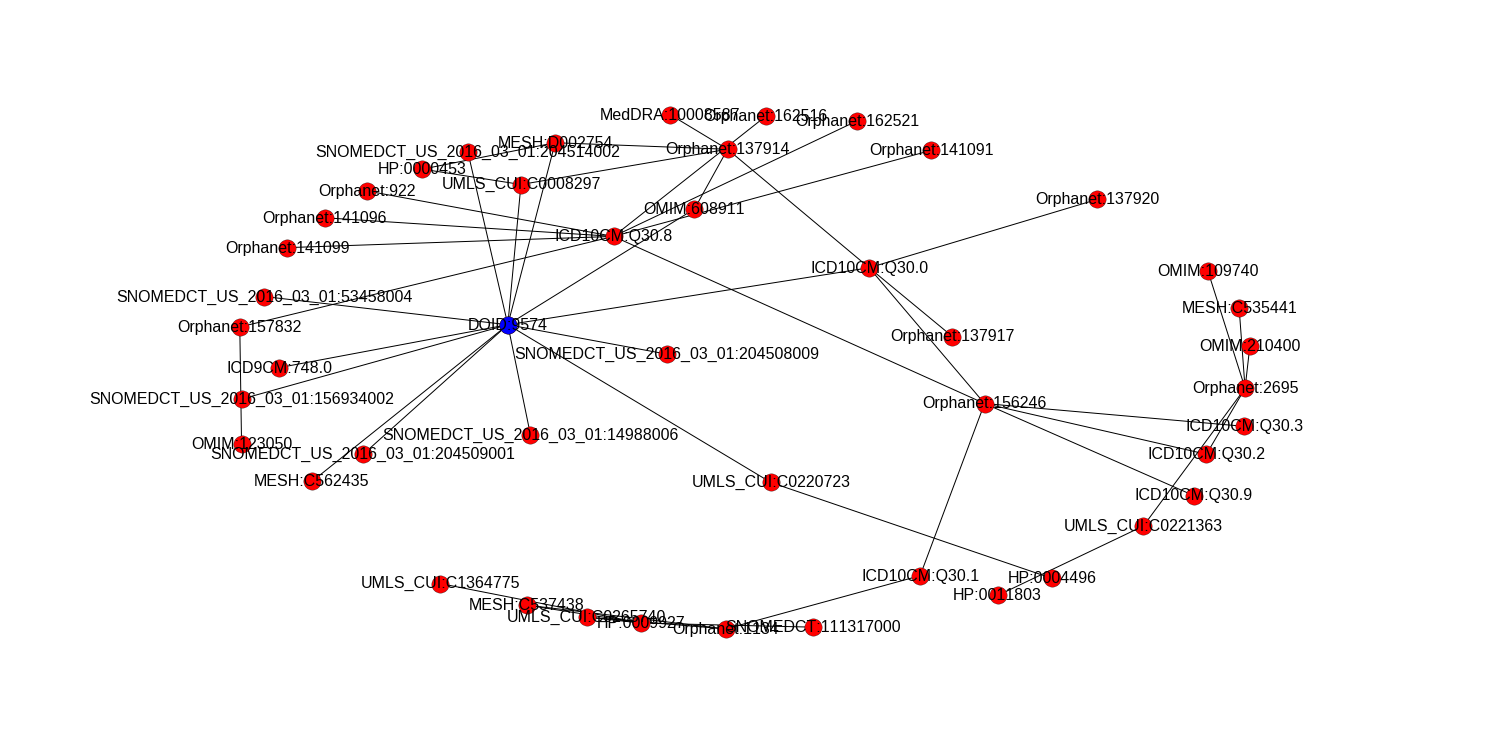

In [163]:
sg = [subgraph for subgraph in ccs if len([x for x in subgraph.nodes() if x.startswith("DOID:")])==1 and len(subgraph)>45][0]
plt.figure(figsize=(20,10))
pos = nx.layout.fruchterman_reingold_layout(sg)
nx.draw(sg, pos, with_labels=True, font_size=16)
do_ids = [x for x in sg.nodes() if x.startswith("DOID:")]
nx.draw_networkx_nodes(sg,pos,nodelist=do_ids,node_color='b')
print(do_ids)

In [35]:
do_ids
db = client.mydisease.DO
print([x['name'] for x in db.find({'_id':{'$in': do_ids}},{'name':1,'preferred_label':1})])

['tyrosinemia type II', 'tyrosinemia type I', 'tyrosinemia type III', 'ochronosis', 'alkaptonuria']


In [148]:
# what nodes are connecting DOIDs?
from itertools import combinations, chain
all_paths = list(chain(*[list(nx.shortest_paths.all_shortest_paths(sg, c[0], c[1])) for c in combinations(do_ids, 2)]))
all_paths = [path for path in all_paths if len(path) == 3]
all_paths

[['DOID:14223', 'ICD10CM:E70.29', 'DOID:9270']]

In [149]:
all_paths = [path[1:-1] for path in all_paths]
Counter([x.split(":")[0] for x in chain(*all_paths)])


Counter({'ICD10CM': 1})

In [150]:
d=[]
subgraphs = [subgraph for subgraph in ccs if 4<len([x for x in subgraph.nodes() if x.startswith("DOID:")])<20]
for sg in subgraphs:
    do_ids = [x for x in sg.nodes() if x.startswith("DOID:")]
    all_paths = list(chain(*[list(nx.shortest_paths.all_shortest_paths(sg, c[0], c[1])) for c in combinations(do_ids, 2)]))
    all_paths = [path for path in all_paths if len(path) == 3]
    all_paths = [path[1:-1] for path in all_paths]
    d.append(Counter([x.split(":")[0] for x in chain(*all_paths)]))


In [151]:
c=Counter()
for x in d:
    c.update(x)
c

Counter({'ICD10CM': 88,
         'ICD9CM': 14,
         'KEGG': 1,
         'MESH': 112,
         'NCI': 16,
         'OMIM': 18,
         'Orphanet': 7,
         'SNOMEDCT_US_2016_03_01': 498,
         'UMLS_CUI': 15})

In [152]:
subgraphs = [subgraph for subgraph in ccs if 4<len([x for x in subgraph.nodes() if x.startswith("DOID:")])<6]
for sg in subgraphs:
    do_ids = [x for x in sg.nodes() if x.startswith("DOID:")]
    all_paths = list(chain(*[list(nx.shortest_paths.all_shortest_paths(sg, c[0], c[1])) for c in combinations(do_ids, 2)]))
    all_paths = [path for path in    all_paths if len(path) == 3]
    all_paths = [path[1:-1] for path in all_paths]
    ids = [x.split(":")[0] for x in chain(*all_paths)]
    if "MESH" in ids:
        print(all_paths)
        break

[['MESH:D002547'], ['MESH:D002547'], ['MESH:D002547'], ['SNOMEDCT_US_2016_03_01:267696006'], ['SNOMEDCT_US_2016_03_01:155024003'], ['MESH:D002547'], ['SNOMEDCT_US_2016_03_01:1178005'], ['MESH:D002547'], ['MESH:D002547']]


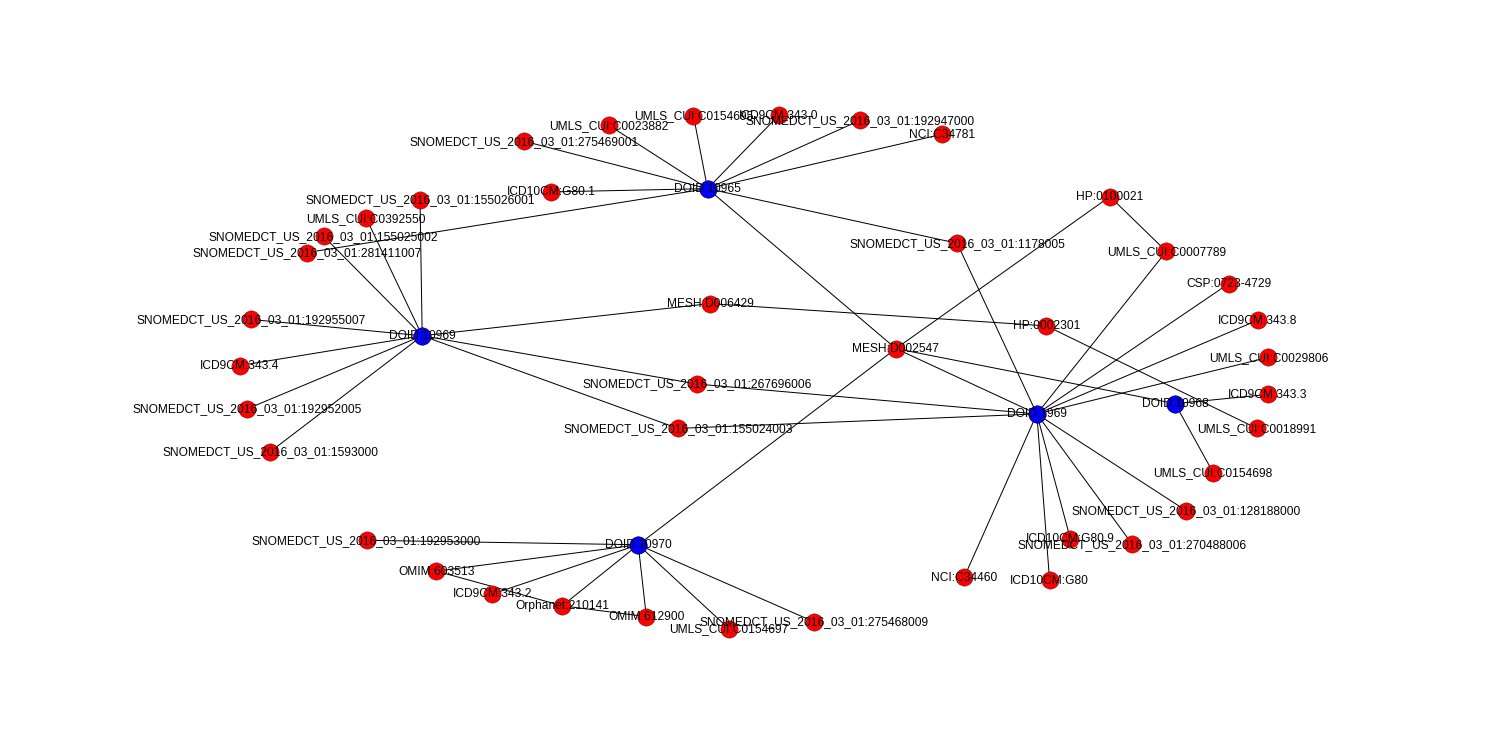

In [153]:
plt.figure(figsize=(20,10))
pos = nx.layout.fruchterman_reingold_layout(sg)
nx.draw(sg, pos, with_labels=True)
do_ids = [x for x in sg.nodes() if x.startswith("DOID:")]
nx.draw_networkx_nodes(sg,pos,nodelist=do_ids,node_color='b')

In [154]:
# DO names
db = client.mydisease.DO
print([x['name'] for x in db.find({'_id':{'$in': do_ids}},{'name':1,'preferred_label':1})])

['spastic diplegia', 'spastic monoplegia', 'hemiplegia', 'spastic quadriplegia', 'cerebral palsy']


### Test

In [165]:
g.neighbors('MESH:C536364')

['Orphanet:1062']

['ICD10CM:B59', 'DOID:11339', 'UMLS_CUI:C1535939', 'ICD10CM:J17.3', 'NCI:C3334', 'SNOMEDCT_US_2016_03_01:415125002', 'MESH:D011020', 'ICD9CM:136.3', 'SNOMEDCT_US_2016_03_01:57541005', 'SNOMEDCT_US_2016_03_01:88860002', 'SNOMEDCT_US_2016_03_01:155557008', 'Orphanet:723']


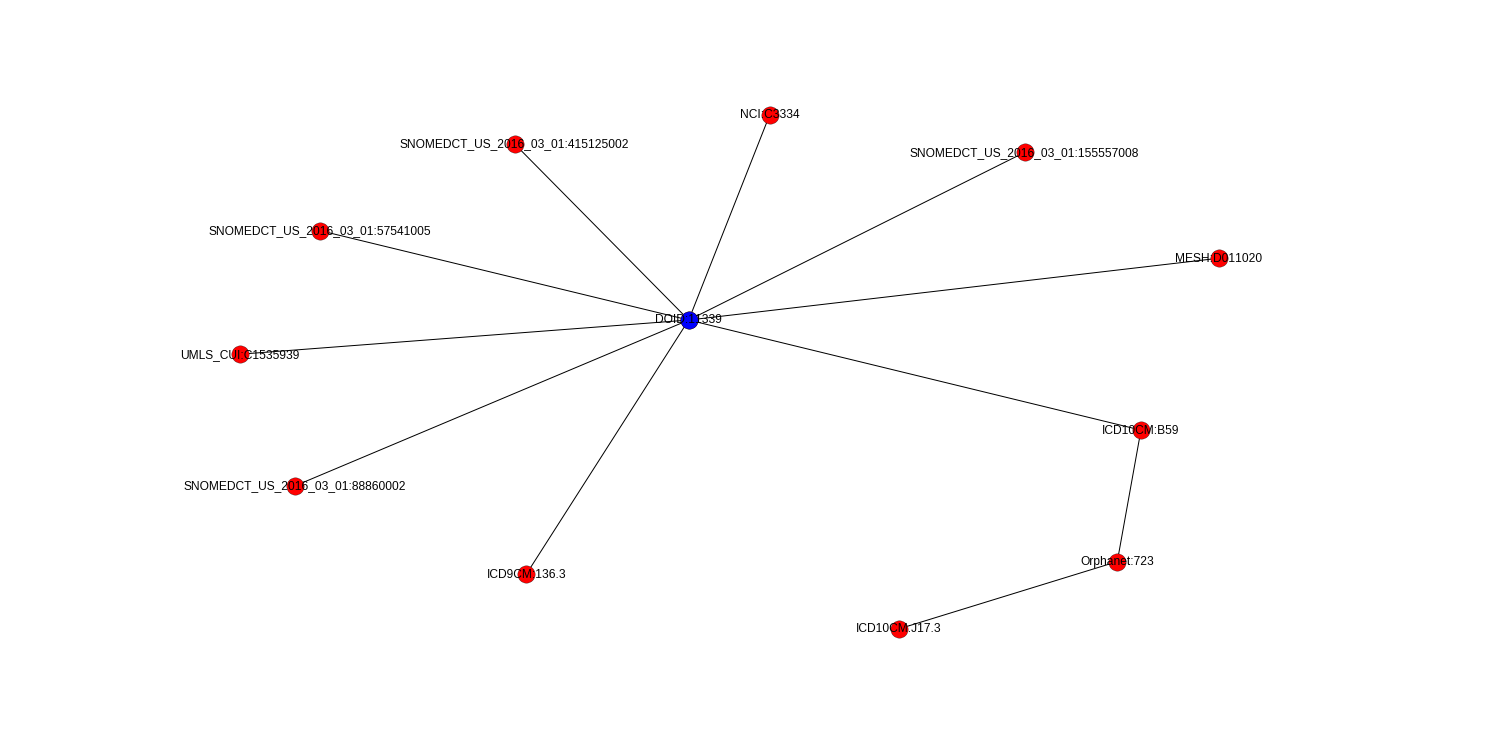

In [187]:
plt.figure(figsize=(20,10))
gg = nx.ego_graph(g, 'Orphanet:723', radius=1000, center=True, undirected=True)
pos = nx.layout.fruchterman_reingold_layout(gg)
nx.draw(gg, pos, with_labels=True)
do_ids = [x for x in gg.nodes() if x.startswith("DOID:")]
nx.draw_networkx_nodes(gg,pos,nodelist=do_ids,node_color='b')
print(gg.nodes())
# https://www.wikidata.org/wiki/Q7205993
# Pneumocystosis

In [188]:
g.neighbors("DOID:11339")

['ICD10CM:B59',
 'SNOMEDCT_US_2016_03_01:57541005',
 'SNOMEDCT_US_2016_03_01:88860002',
 'ICD9CM:136.3',
 'UMLS_CUI:C1535939',
 'SNOMEDCT_US_2016_03_01:155557008',
 'NCI:C3334',
 'SNOMEDCT_US_2016_03_01:415125002',
 'MESH:D011020']